### MEDC0106: Bioinformatics in Applied Biomedical Science

<p align="center">
  <img src="../../resources/static/Banner.png" alt="MEDC0106 Banner" width="90%"/>
  <br>
</p>

---------------------------------------------------------------

# 09 - Introduction to Biopython - Proteins

*Written by:* Mateusz Kaczyński


## Contents


1. [Basic analysis](#Basic-analysis)
2. [Property prediction](#Property-prediction)
3. [BLAST](#BLAST)
4. [PDB files](#PDB-files)
5. [Discussion](#Discussion)
-----



## Basic analysis

In [5]:
import Bio
print("Module", Bio.__name__, "version", Bio.__version__)
from urllib.request import urlretrieve
from Bio import SeqIO

Module Bio version 1.79



We will be analysing Cystic fibrosis transmembrane conductance regulator (CFTR) gene and the protein it encodes.

**Ensembl**: https://www.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000001626;r=7:117287120-117715971

**Uniprot**: https://www.uniprot.org/uniprot/P13569


In [8]:
# We will download and extract the corresponding fasta to extract the sequence.

urlretrieve("https://www.uniprot.org/uniprot/P13569.fasta", "data/P13569.fasta")
cftr_aa = next(SeqIO.parse("data/P13569.fasta", "fasta"))
print(cftr_aa)

ID: sp|P13569|CFTR_HUMAN
Name: sp|P13569|CFTR_HUMAN
Description: sp|P13569|CFTR_HUMAN Cystic fibrosis transmembrane conductance regulator OS=Homo sapiens OX=9606 GN=CFTR PE=1 SV=3
Number of features: 0
Seq('MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLE...TRL')


In [13]:
# Basic statistics
from Bio.SeqUtils.ProtParam import ProteinAnalysis
analysis = ProteinAnalysis(str(cftr_aa.seq))
count_of_aas = analysis.count_amino_acids() 
help(analysis)

Help on ProteinAnalysis in module Bio.SeqUtils.ProtParam object:

class ProteinAnalysis(builtins.object)
 |  ProteinAnalysis(prot_sequence, monoisotopic=False)
 |  
 |  Class containing methods for protein analysis.
 |  
 |  The constructor takes two arguments.
 |  The first is the protein sequence as a string, which is then converted to a
 |  sequence object using the Bio.Seq module. This is done just to make sure
 |  the sequence is a protein sequence and not anything else.
 |  
 |  The second argument is optional. If set to True, the weight of the amino
 |  acids will be calculated using their monoisotopic mass (the weight of the
 |  most abundant isotopes for each element), instead of the average molecular
 |  mass (the averaged weight of all stable isotopes for each element).
 |  If set to false (the default value) or left out, the IUPAC average
 |  molecular mass will be used for the calculation.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, prot_sequence, monoisotopic=F

In [66]:
print("Count of particular aminoacids")
print(count_of_aas)
print("Using PrettyPrint for more user-friendly representation.")
import pprint
pprint.pprint(count_of_aas)

Count of particular aminoacids
{'A': 83, 'C': 18, 'D': 58, 'E': 93, 'F': 85, 'G': 84, 'H': 25, 'I': 119, 'K': 92, 'L': 183, 'M': 37, 'N': 54, 'P': 45, 'Q': 67, 'R': 78, 'S': 123, 'T': 83, 'V': 90, 'W': 23, 'Y': 40}
Using PrettyPrint for more user-friendly representation.
{'A': 83,
 'C': 18,
 'D': 58,
 'E': 93,
 'F': 85,
 'G': 84,
 'H': 25,
 'I': 119,
 'K': 92,
 'L': 183,
 'M': 37,
 'N': 54,
 'P': 45,
 'Q': 67,
 'R': 78,
 'S': 123,
 'T': 83,
 'V': 90,
 'W': 23,
 'Y': 40}


In [67]:
print("Molecular weigth    :", "{:.2f}".format(analysis.molecular_weight()))
print("Charge at a given pH:", "{:.2f}".format(analysis.charge_at_pH(5.8)))
print("Isoelectric point   :", "{:.2f}".format(analysis.isoelectric_point()))
in_helix, in_turn, in_sheet = analysis.secondary_structure_fraction()
print(
    "Fractions of AA associated with secondary structures:\n"\
    "  Helix: {:.2f}\n"\
    "  Turn: {:.2f}\n"\
    "  Sheet: {:.2f}\n".format(in_helix, in_turn, in_sheet)
)

Molecular weigth    : 168139.53
Charge at a given pH: 38.97
Isoelectric point   : 8.91
Fractions of AA associated with secondary structures:
  Helix: 0.36
  Turn: 0.21
  Sheet: 0.27



In [68]:
print("BCAA content:", sum(count_of_aas[aa] for aa in ["L", "I", "V"])/ len(cftr_aa))

BCAA content: 0.2648648648648649


## Property prediction

We will analyse the hydrophobicity of the protein. [The Kyte-Doolittle scale](https://doi.org/10.1016/0022-2836(82)90515-0) is useful for predicting the hydropathic character of the molecule and is based on the experimentally - derived aminoacid properties as defined below.


In [69]:
Kyte_and_Doolittle_scale = {
    "A": 1.8, "C": 2.5, "D": -3.5, "E": -3.5, "F": 2.8, 
    "G": -0.4, "H": -3.2, "I": 4.5, "K": -3.9, "L": 3.8,
    "M": 1.9, "N": -3.5, "P": -1.6, "Q": -3.5, "R": -4.5,
    "S": -0.8, "T": -0.7, "V": 4.2, "W": -0.9, "Y": -1.3
}

In [70]:
sequence = """MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRE
LASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIA
IYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQL
VSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGL
GRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAA
YVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQT
WYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRK
TSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEG
KIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIV
LGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTR
ILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNS
ILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQ
MNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQG
QNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESI
PAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRN
NSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSVLQAP
MSTLNTLKAGGILNRFSKDIAILDDLLPLTIFDFIQLLLIVIGAIAVVAVLQPYIFVATV
PVIVAFIMLRAYFLQTSQQLKQLESEGRSPIFTHLVTSLKGLWTLRAFGRQPYFETLFHK
ALNLHTANWFLYLSTLRWFQMRIEMIFVIFFIAVTFISILTTGEGEGRVGIILTLAMNIM
STLQWAVNSSIDVDSLMRSVSRVFKFIDMPTEGKPTKSTKPYKNGQLSKVMIIENSHVKK
DDIWPSGGQMTVKDLTAKYTEGGNAILENISFSISPGQRVGLLGRTGSGKSTLLSAFLRL
LNTEGEIQIDGVSWDSITLQQWRKAFGVIPQKVFIFSGTFRKNLDPYEQWSDQEIWKVAD
EVGLRSVIEQFPGKLDFVLVDGGCVLSHGHKQLMCLARSVLSKAKILLLDEPSAHLDPVT
YQIIRRTLKQAFADCTVILCEHRIEAMLECQQFLVIEENKVRQYDSIQKLLNERSLFRQA
ISPSDRVKLFPHRNSSKCKSKPQIAALKEETEEEVQDTRL""".replace("\n", "")
window_size = 11

hydrophobicity = []
for i, aa in enumerate(sequence):
    window_start = int(i - (window_size-1)/2)
    window_end = int(i + (window_size-1)/2)+1

    if window_start < 0 or window_end > len(sequence):
        window_hydrophobicity = None

    else:
        aas_in_window = sequence[window_start:window_end]
        assert len(aas_in_window) == window_size, f"{len(aas_in_window)}, {window_size}"
        window_hydrophobicity = sum([Kyte_and_Doolittle_scale[aa] for aa in aas_in_window]) / window_size
    hydrophobicity.append(window_hydrophobicity)

print("Calculated hydrophobicity for {} positions".format(len(hydrophobicity)))
print("Average hydrophobicity:", "{:.4f}".format(sum(h if h else 0 for h in hydrophobicity) / len(hydrophobicity))) 


Calculated hydrophobicity for 1480 positions
Average hydrophobicity: 0.0318


<IPython.core.display.Javascript object>


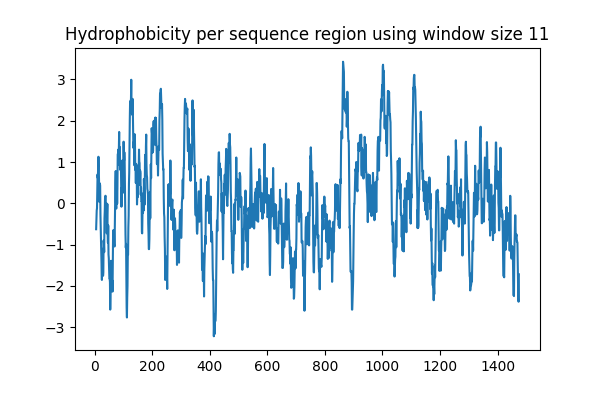

In [71]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

plt.plot(hydrophobicity)
plt.title("Hydrophobicity per sequence region using window size {}".format(window_size))
plt.show()

## BLAST

In [74]:
from Bio.Blast import NCBIWWW, NCBIXML
# This code will take several minutes to run as it executes a BLAST search in NCBI cloud environment.
query_handle = NCBIWWW.qblast("blastp", database="nr", sequence=cftr_aa.seq)
blast_results = next(NCBIXML.parse(query_handle))

In [75]:
import pandas as pd
df = pd.DataFrame([
    {
        "title": a.title, 
        "accession": a.accession, 
        "hit_def": a.hit_def, 
        "length": a.length, 
        "e_value": a.hsps[0].expect
    } 
    for a in blast_results.alignments
])
print(df)


                                                title     accession  \
0   pdb|5UAK|A Dephosphorylated, ATP-free human cy...        5UAK_A   
1   ref|NP_000483.3| cystic fibrosis transmembrane...     NP_000483   
2   gb|AAC13657.1| cystic fibrosis transmembrane c...      AAC13657   
3   pdb|6MSM|A Phosphorylated, ATP-bound human cys...        6MSM_A   
4   gb|QTH79672.1| cystic fibrosis transmembrane c...      QTH79672   
5   gb|QTH79670.1| cystic fibrosis transmembrane c...      QTH79670   
6   gb|ABD72213.1| cystic fibrosis transmembrane c...      ABD72213   
7   gb|AAA35680.1| cystic fibrosis transmembrane c...      AAA35680   
8   ref|XP_003808695.1| cystic fibrosis transmembr...  XP_003808695   
9   ref|XP_018885847.2| cystic fibrosis transmembr...  XP_018885847   
10  gb|AKC92819.1| SUMO*-CFTR.FLAG-EGFP [synthetic...      AKC92819   
11  sp|Q2IBF6.1| RecName: Full=Cystic fibrosis tra...        Q2IBF6   
12  ref|NP_001073386.1| cystic fibrosis transmembr...  NP_001073386   
13  re

## PDB files

We will download and briefly analyse the experimentally determined [structure of the protein encoded by CFTR gene](https://www.rcsb.org/structure/6O1V).

In [ ]:
from urllib.request import urlretrieve 
result_location, _ = urlretrieve("https://files.rcsb.org/download/6O1V.pdb", "data/6O1V.pdb")
print("File downloaded to:", result_location)